In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Constructor Influence in recent 10 years

In [4]:
results = pd.read_csv('data/results.csv')
races = pd.read_csv('data/races.csv')
constructor = pd.read_csv('data/constructors.csv')

In [5]:
results['position'] = results['position'].replace('\\N',0)
results['position'] = results['position'].astype(int)

In [6]:
races_latest10 = races[races['year']>=2012]
races_latest10

,raceId,year,round,circuitId,name,date,time,url
858,860,2012,1,1,Australian Grand Prix,18/03/12,6:00:00,http://en.wikipedia.org/wiki/2012_Australian_G...
859,861,2012,2,2,Malaysian Grand Prix,25/03/12,8:00:00,http://en.wikipedia.org/wiki/2012_Malaysian_Gr...
860,862,2012,3,17,Chinese Grand Prix,15/04/12,7:00:00,http://en.wikipedia.org/wiki/2012_Chinese_Gran...
861,863,2012,4,3,Bahrain Grand Prix,22/04/12,12:00:00,http://en.wikipedia.org/wiki/2012_Bahrain_Gran...
862,864,2012,5,4,Spanish Grand Prix,13/05/12,12:00:00,http://en.wikipedia.org/wiki/2012_Spanish_Gran...
...,...,...,...,...,...,...,...,...
1074,1092,2022,18,22,Japanese Grand Prix,09/10/22,5:00:00,http://en.wikipedia.org/wiki/2022_Japanese_Gra...
1075,1093,2022,19,69,United States Grand Prix,23/10/22,19:00:00,http://en.wikipedia.org/wiki/2022_United_State...
1076,1094,2022,20,32,Mexico City Grand Prix,30/10/22,20:00:00,http://en.wikipedia.org/wiki/2022_Mexican_Gran...
1077,1095,2022,21,18,Brazilian Grand Prix,13/11/22,18:00:00,http://en.wikipedia.org/wiki/2022_Brazilian_Gr...


In [7]:
results_latest10 = results[results['raceId']>=860]
results_latest10_Winner = results_latest10[results_latest10['position']==3]
results_latest10_Winner

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
21231,21234,860,1,1,4,1,3,3,3,15.0,58,+4.075,5653640,57,4,1:29.538,213.214,1
21255,21258,861,1,1,4,1,3,3,3,15.0,56,+14.591,9906403,50,6,1:41.539,196.523,1
21279,21282,862,1,1,4,7,3,3,3,15.0,56,+26.012,5812941,40,6,1:40.530,195.201,1
21303,21306,863,154,208,10,7,3,3,3,15.0,57,+10.194,5721184,42,3,1:36.928,201.006,1
21327,21330,864,8,208,9,4,3,3,3,15.0,66,+3.884,5953029,50,2,1:26.938,192.758,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25362,25368,1072,822,131,77,2,3,3,3,15.0,50,+27.531,7602649,47,2,1:31.408,243.155,1
25382,25388,1073,832,6,55,5,3,3,3,15.0,58,+5.173,5422518,51,9,1:27.618,216.982,1
25402,25408,1074,1,131,44,5,3,3,3,15.0,57,+9.675,5863259,53,5,1:36.228,202.469,1
25422,25428,1075,832,6,55,3,3,3,3,15.0,50,+8.097,5067390,48,3,1:31.905,241.841,1


<AxesSubplot:>

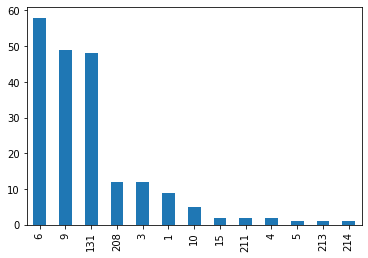

In [8]:
results_latest10_Winner['constructorId'].value_counts().plot.bar()

In [9]:
df1 = results_latest10_Winner.merge(races, on = 'raceId')

In [10]:
df2 = df1[['constructorId','year']]
df3 = df2[df2['constructorId'] == 131]
df4 = df2[df2['constructorId'] == 9]
df5 = df2[df2['constructorId'] == 6]

<AxesSubplot:xlabel='year,constructorId'>

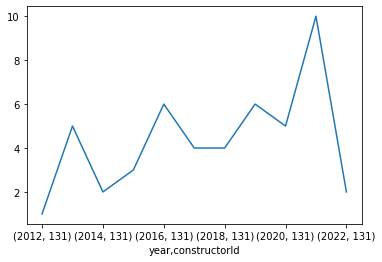

In [11]:
df3.groupby('year').value_counts().plot.line()

<AxesSubplot:xlabel='year,constructorId'>

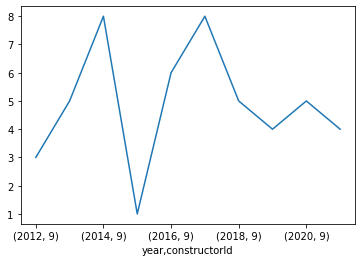

In [12]:
df4.groupby('year').value_counts().plot.line()

<AxesSubplot:xlabel='year,constructorId'>

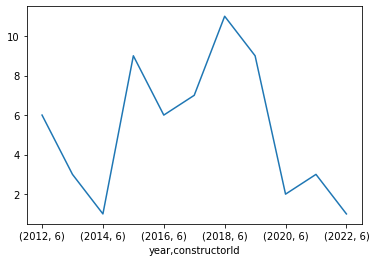

In [13]:
df5.groupby('year').value_counts().plot.line()

## Driver data

In [38]:
driver = pd.read_csv('data/driver_standings.csv')
driver_info = pd.read_csv('data/drivers.csv')
driver = driver.merge(driver_info, on = 'driverId')
temp_df = driver[(driver['position']==1) & (driver['raceId']>= 860)]
temp_df

,driverStandingsId,raceId,driverId,points,position,positionText,wins,driverRef,number,code,forename,surname,dob,nationality,url
92,64954,862,1,45.0,1,1,0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
96,65074,866,1,88.0,1,1,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
133,66719,904,1,100.0,1,1,4,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
142,66919,913,1,241.0,1,1,7,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
143,66942,914,1,266.0,1,1,8,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11846,69995,1031,822,25.0,1,1,1,bottas,77,BOT,Valtteri,Bottas,1989-08-28,Finnish,http://en.wikipedia.org/wiki/Valtteri_Bottas
11847,69809,1032,822,43.0,1,1,1,bottas,77,BOT,Valtteri,Bottas,1989-08-28,Finnish,http://en.wikipedia.org/wiki/Valtteri_Bottas
33164,71252,1074,844,26.0,1,1,1,leclerc,16,LEC,Charles,Leclerc,1997-10-16,Monegasque,http://en.wikipedia.org/wiki/Charles_Leclerc
33165,71272,1075,844,45.0,1,1,1,leclerc,16,LEC,Charles,Leclerc,1997-10-16,Monegasque,http://en.wikipedia.org/wiki/Charles_Leclerc


<AxesSubplot:title={'center':'driver'}>

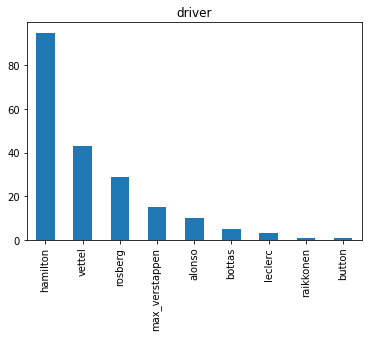

In [40]:
temp_df['driverRef'].value_counts().plot.bar(title = 'driver')